In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv(r'C:\Users\Test\Documents\For Port\Python\world_population.csv', encoding = 'unicode_escape')

In [15]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (kmÂ²)                    0
Density (per kmÂ²)             0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [16]:
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (kmÂ²)                      int64
Density (per kmÂ²)             float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [17]:
df['Continent'].value_counts()

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

In [18]:
df['Country/Territory'].nunique()

234

In [19]:
max_countrys=[]
max_populations=[]
columns=['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1970 Population']
for year in columns:
    max_country=df.loc[df[year].idxmax()]['Country/Territory']
    max_population=df[year].max()
    max_countrys.append(max_country)
    max_populations.append(max_population)

In [20]:
print(max_countrys)
print(max_populations)

['China', 'China', 'China', 'China', 'China', 'China', 'China']
[1425887337, 1424929781, 1393715448, 1348191368, 1264099069, 1153704252, 822534450]


<strong>China Has all time high population

In [21]:
world_population = []
for years in columns:
    world_population.append(sum(df[years]))

In [22]:
world_population

[7973413042,
 7839250603,
 7424809761,
 6983784998,
 6147055703,
 5314191665,
 3694136661]

In [23]:
# world_popuulation.reverse()
import matplotlib.pyplot as plt

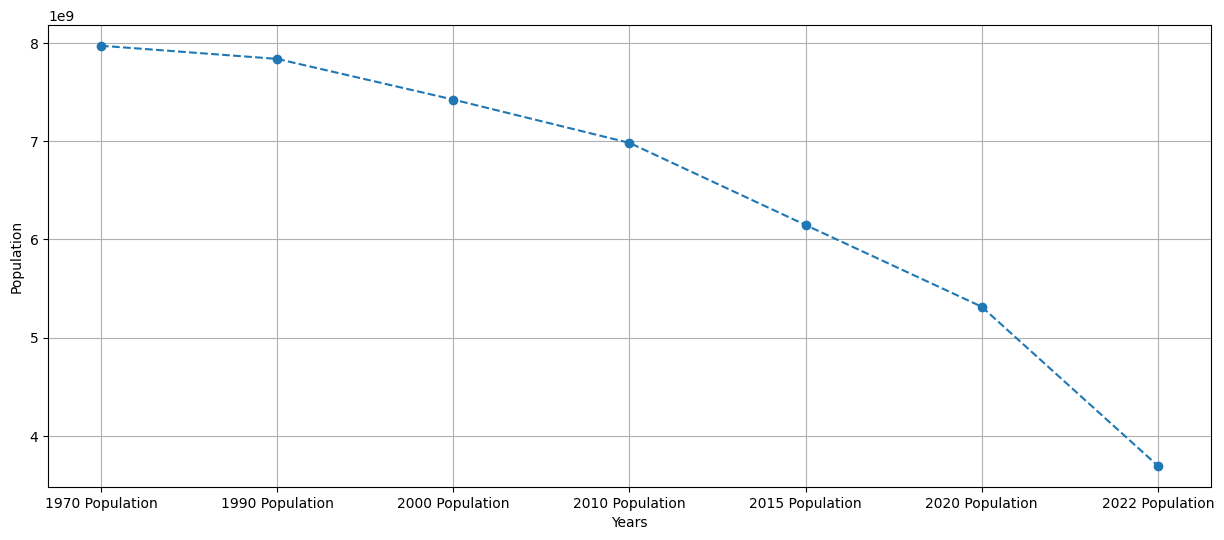

In [27]:
# columns.reverse()
plt.figure(figsize=(15,6))
columns=labels
plt.plot(labels,world_population, marker='o', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Population')
plt.grid()
plt.show()

In [28]:
current_pop=sum(df['2022 Population'])

In [30]:
growth_rate=[]
for year in columns:
    growth_rate.append((current_pop-sum(df[year]))/sum(df[year])*100)

In [31]:
growth_rate

[115.83968796220991,
 50.039997512961364,
 29.711091410944384,
 14.170368135379416,
 7.388785688242498,
 1.711419187806771,
 0.0]

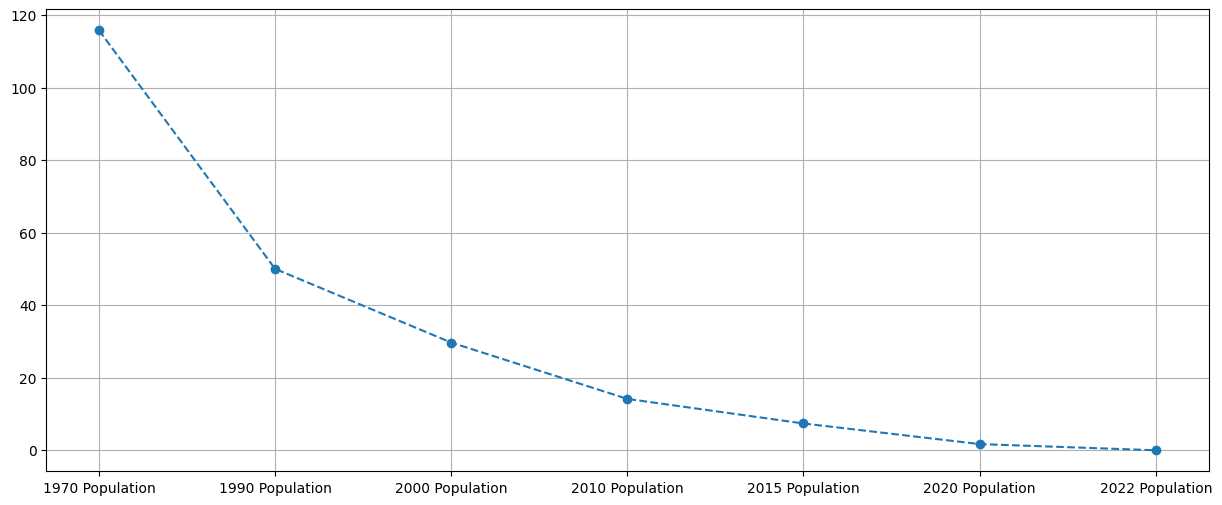

In [32]:
plt.figure(figsize=(15,6))
plt.plot(labels,growth_rate, marker='o', linestyle='--')
plt.grid()

<strong>World Population growth rate change

In [36]:
max_density_country=df.loc[df['Density (per km²)'].idxmax()]['Country/Territory']
max_density=df['Density (per km²)'].max()
print("maximim density of population has " +max_density_country)
print("Having density is "+str(max_density))

maximim density of population has Macau
Having density is 23172.2667


<strong>Macau has the maximum density of population. that is 23172.2667

In [49]:
min_density_country=df.loc[df['Density (per km²)'].idxmin()]['Country/Territory']
min_density=df['Density (per km²)'].min()
print("minimum density of population has " +min_density_country)
print("Having density is "+str(min_density))

minimum density of population has Greenland
Having density is 0.0261


<strong>Greenland has the minimum density of population. that is 0.0261

In [46]:
max_Growth_Rate_country=df.loc[df['Growth Rate'].idxmax()]['Country/Territory']
max_Growth_Rate=df['Growth Rate'].max()
print("maximim Growth Rate of population has " +max_Growth_Rate_country)
print("Having Growth Rate is "+str(max_Growth_Rate))

maximim Growth Rate of population has Moldova
Having Growth Rate is 1.0691


<strong>Moldova has the maximum growth rate compare with others. that is 1.0691

In [47]:
min_Growth_Rate_country=df.loc[df['Growth Rate'].idxmin()]['Country/Territory']
min_Growth_Rate=df['Growth Rate'].min()
print("maximim Growth Rate of population has " +min_Growth_Rate_country)
print("Having Growth Rate is "+str(min_Growth_Rate))

maximim Growth Rate of population has Ukraine
Having Growth Rate is 0.912


<strong>Ukraine is Having Growth Rate of 0.912, which is the Minimum Growth Rate of population.

In [52]:
max_Area_country=df.loc[df['Area (km²)'].idxmax()]['Country/Territory']
max_Area=df['Area (km²)'].max()
print("maximim Area country is " +max_Area_country)
print("Having Area is "+str(max_Area))

maximim Area country is Russia
Having Area is 17098242


In [57]:
min_Area_country=df.loc[df['Area (km²)'].idxmin()]['Country/Territory']
min_Area=df['Area (km²)'].min()
print("minimum Area country is " +min_Area_country)
print("Having Area is "+str(min_Area))

minimum Area country is Vatican City
Having Area is 1


In [72]:
group_continent=df.groupby('Continent').agg({'2022 Population':'sum', '2020 Population':'sum', '2015 Population':'sum', '2010 Population':'sum', '2000 Population':'sum', '1990 Population':'sum', '1970 Population':'sum'})

In [73]:
group_continent=group_continent.reset_index()

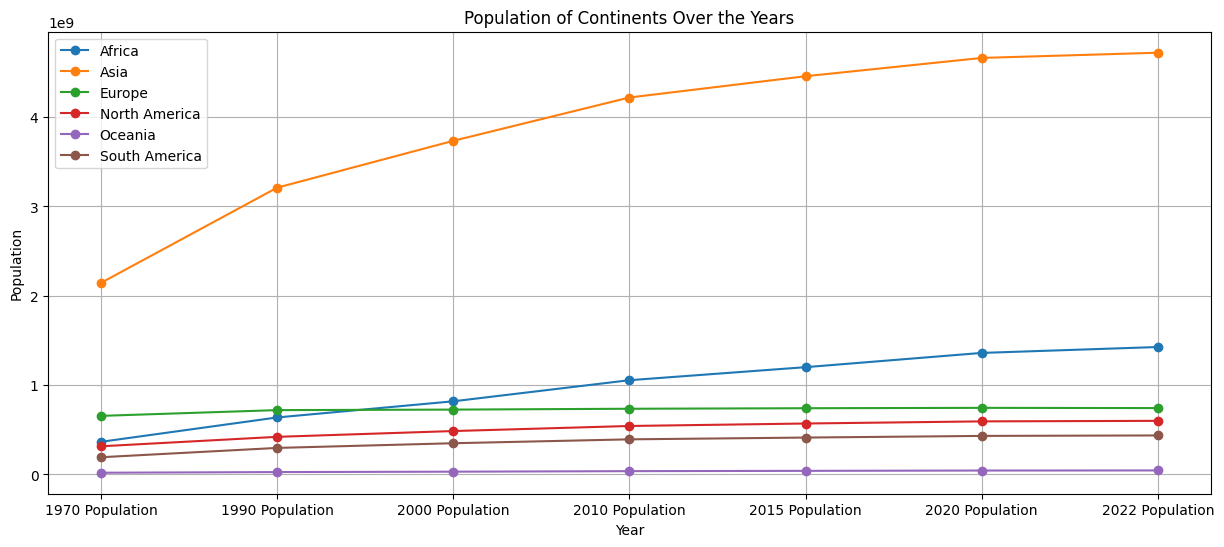

In [81]:
continents = group_continent['Continent']
years = group_continent.columns[1:]
plt.figure(figsize=(15,6))
for i, continent in enumerate(continents):
    data_row = group_continent.iloc[i, 1:][::-1]
    plt.plot(years[::-1], data_row, label=continent, marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Continents Over the Years')
plt.legend()
plt.grid()

plt.show()


In [27]:
group_Continent_by_density=df.groupby('Continent').agg({'2022 Population':'sum', 'Area (km²)':'sum'}).reset_index()

In [28]:
group_Continent_by_density['Continent Density']=group_Continent_by_density['2022 Population']/group_Continent_by_density['Area (km²)']

In [29]:
group_Continent_by_density

,Continent,2022 Population,Area (km²),Continent Density
0,Africa,1426730932,30317963,47.058931
1,Asia,4721383274,32138141,146.909035
2,Europe,743147538,23010411,32.296144
3,North America,600296136,24244178,24.760424
4,Oceania,45038554,8515081,5.289269
5,South America,436816608,17833382,24.494322


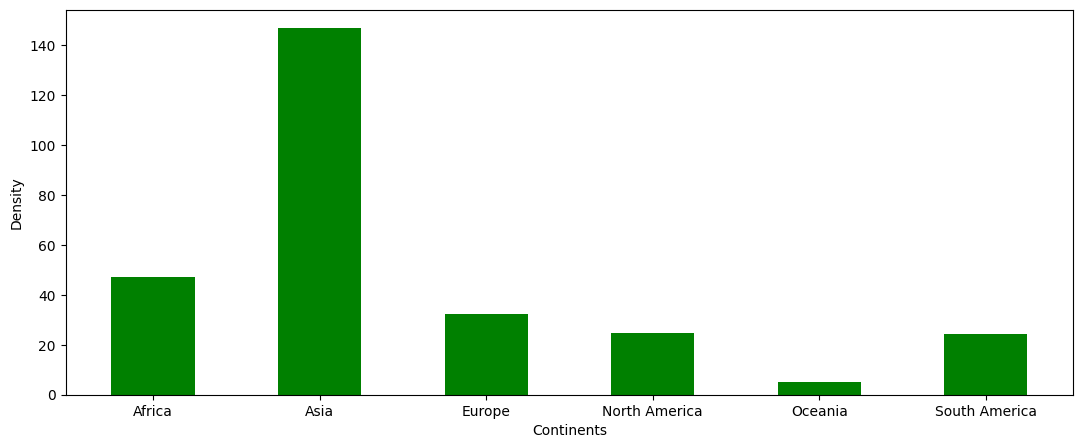

In [99]:
plt.figure(figsize=(13,5))
plt.bar(group_Continent_by_density['Continent'],group_Continent_by_density['Continent Density'],width=0.5, color='g')
plt.xlabel('Continents')
plt.ylabel('Density')
plt.show()

In [8]:
group_Continent_by_percentage=df.groupby('Continent').agg({'World Population Percentage':'sum'}).reset_index()

In [9]:
group_Continent_by_percentage

,Continent,World Population Percentage
0,Africa,17.87
1,Asia,59.19
2,Europe,9.33
3,North America,7.51
4,Oceania,0.55
5,South America,5.48


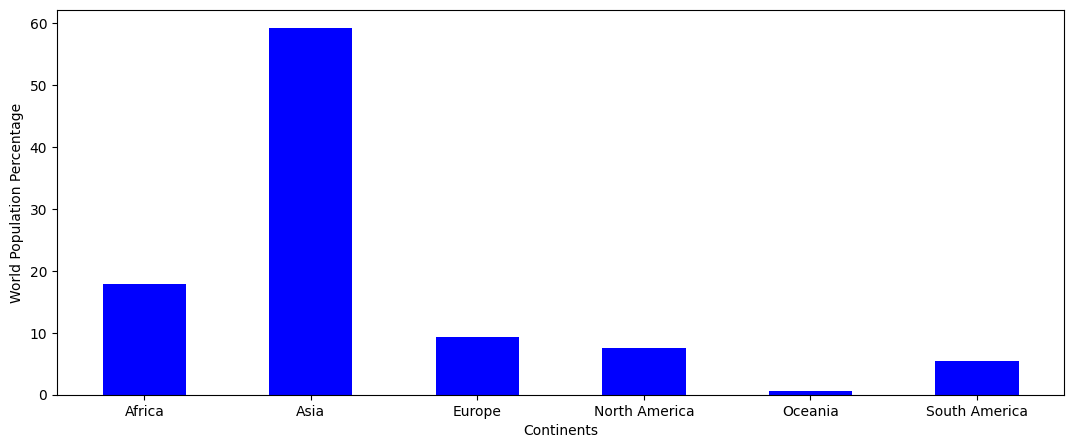

In [13]:
plt.figure(figsize=(13,5))
plt.bar(group_Continent_by_percentage['Continent'],group_Continent_by_percentage['World Population Percentage'],width=0.5, color='b')
plt.xlabel('Continents')
plt.ylabel('World Population Percentage')
plt.show()

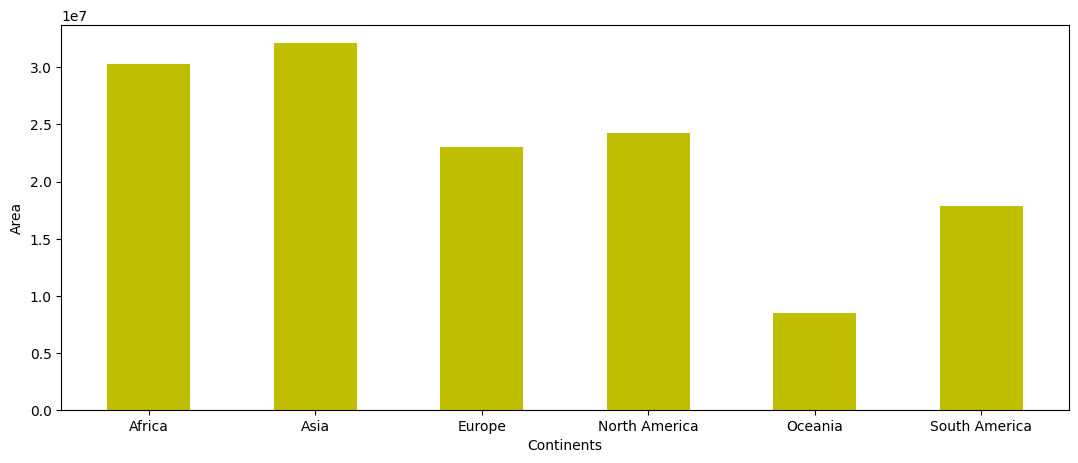

In [30]:
plt.figure(figsize=(13,5))
plt.bar(group_Continent_by_density['Continent'],group_Continent_by_density['Area (km²)'],width=0.5, color='y')
plt.xlabel('Continents')
plt.ylabel('Area')
plt.show()

In [16]:
df_sorted = df.sort_values(by='Rank',ascending=True)

In [17]:
df_sorted=df_sorted.reset_index()
df_sorted.set_index('Rank',inplace=True)

In [18]:
df_sorted=df_sorted.reset_index()

In [19]:
df_sorted

,Rank,index,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,1,41,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,2,92,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
2,3,221,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
3,4,93,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
4,5,156,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,137,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
230,231,64,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
231,232,150,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
232,233,209,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


In [20]:
df_1st_five1=df_sorted[df_sorted['Rank']<6]

In [21]:
df_1st_five=df_1st_five1.drop(['Rank','CCA3', 'Capital', 'Continent','Area (km²)','Density (per km²)','Growth Rate','World Population Percentage'], axis=1)

ValueError: could not convert string to float: 'China'

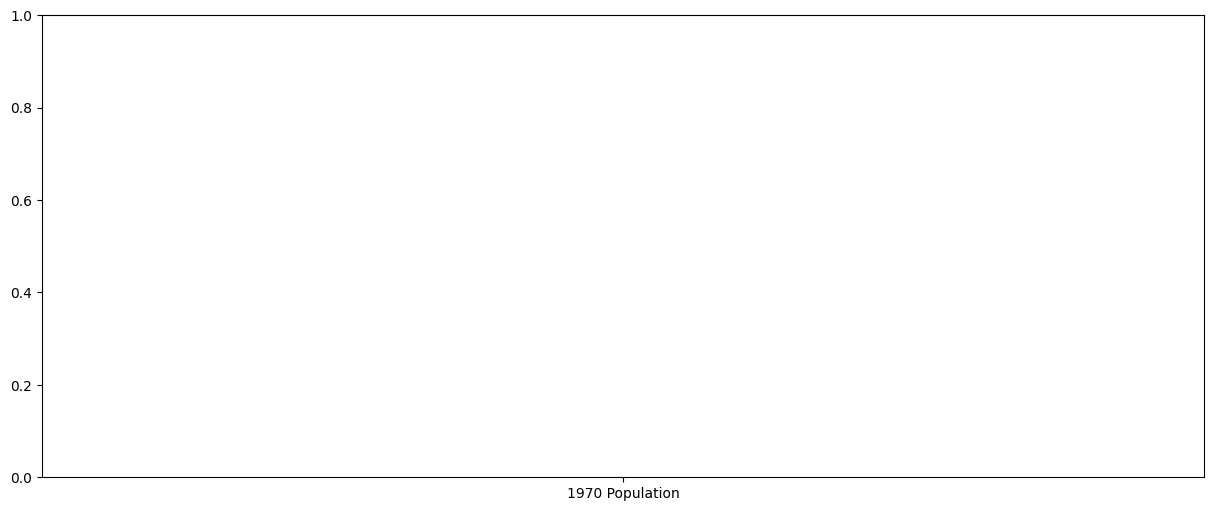

In [22]:
Country = df_1st_five['Country/Territory']

years = df_1st_five.columns[1:]

plt.figure(figsize=(15, 6))

for i, Country in enumerate(Country):
    data_row = df_1st_five.iloc[i, 1:][::-1]
    plt.plot(years[::-1], data_row, label=Country, marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of 1st Five Countries Over the Years')
plt.legend()
plt.grid()

plt.show()

<strong>Population of 1st Five COuntries over the year

In [17]:
df_growth_rate_top_countries=df_1st_five1[['Country/Territory','Growth Rate']]

In [18]:
df_growth_rate_top_countries

,Country/Territory,Growth Rate
0,China,1.0000
1,India,1.0068
2,United States,1.0038
3,Indonesia,1.0064
4,Pakistan,1.0191


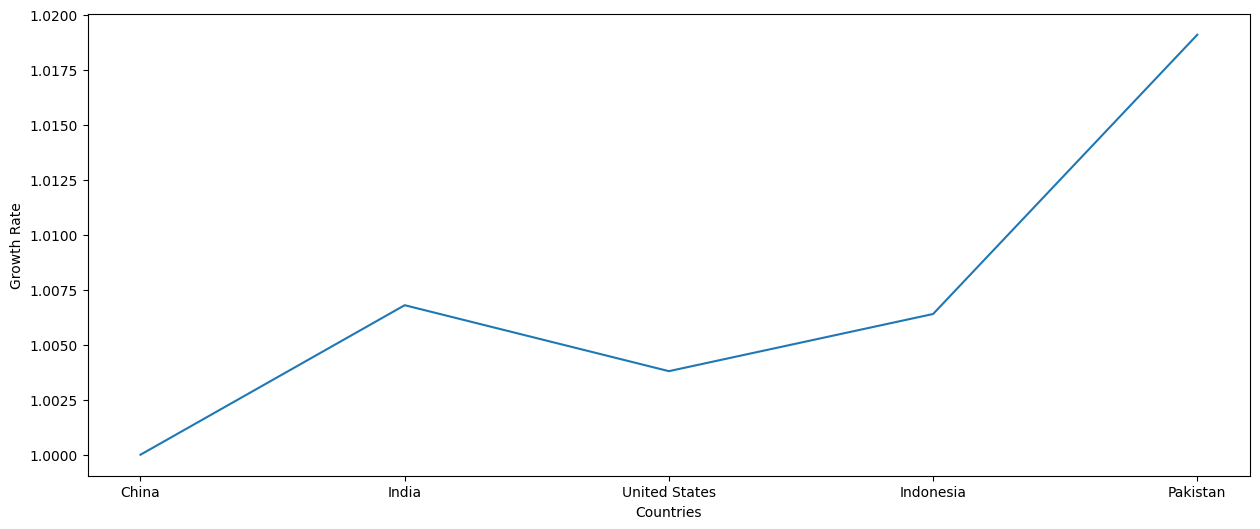

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df_growth_rate_top_countries['Country/Territory'],df_growth_rate_top_countries['Growth Rate'])
plt.xlabel('Countries')
plt.ylabel('Growth Rate')
plt.show()